# Phân tích dữ liệu Flights & Salaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

path_salaries = 'data/Salaries.csv'
path_flights = 'data/flights.csv'

salaries = pd.read_csv(path_salaries)
flights = pd.read_csv(path_flights)

# Chuẩn hóa cột datetime cho flights (để vẽ theo ngày)
flights['date'] = pd.to_datetime(dict(year=flights['year'], month=flights['month'], day=flights['day']), errors='coerce')

# Xác định cột dạng số
num_cols_salaries = salaries.select_dtypes(include=[np.number]).columns.tolist()
num_cols_flights = flights.select_dtypes(include=[np.number]).columns.tolist()

print('Salaries numeric columns:', num_cols_salaries)
print('Flights numeric columns:', num_cols_flights)

Salaries numeric columns: ['phd', 'service', 'salary']
Flights numeric columns: ['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'flight', 'air_time', 'distance', 'hour', 'minute']


In [3]:
flights

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
0       2013      1    1     517.0        2.0     830.0       11.0      UA   
1       2013      1    1     533.0        4.0     850.0       20.0      UA   
2       2013      1    1     542.0        2.0     923.0       33.0      AA   
3       2013      1    1     554.0       -6.0     812.0      -25.0      DL   
4       2013      1    1     554.0       -4.0     740.0       12.0      UA   
...      ...    ...  ...       ...        ...       ...        ...     ...   
160749  2013      9   30    2105.0       -1.0    2329.0      -25.0      UA   
160750  2013      9   30    2121.0       21.0    2349.0      -25.0      DL   
160751  2013      9   30    2140.0        0.0      10.0      -30.0      AA   
160752  2013      9   30    2149.0       -7.0    2245.0      -23.0      UA   
160753  2013      9   30    2233.0       80.0     112.0       42.0      UA   

       tailnum  flight origin dest  air_time  distance  hour  minute  \
0       N14228    1545    EWR  IAH     227.0      1400   5.0    17.0   
1       N24211    1714    LGA  IAH     227.0      1416   5.0    33.0   
2       N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0   
3       N668DN     461    LGA  ATL     116.0       762   5.0    54.0   
4       N39463    1696    EWR  ORD     150.0       719   5.0    54.0   
...        ...     ...    ...  ...       ...       ...   ...     ...   
160749  N477UA     475    EWR  IAH     175.0      1400  21.0     5.0   
160750  N193DN    2363    JFK  LAX     296.0      2475  21.0    21.0   
160751  N335AA     185    JFK  LAX     298.0      2475  21.0    40.0   
160752  N813UA     523    EWR  BOS      37.0       200  21.0    49.0   
160753  N578UA     471    EWR  SFO     318.0      2565  22.0    33.0   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
160749 2013-09-30  
160750 2013-09-30  
160751 2013-09-30  
160752 2013-09-30  
160753 2013-09-30  

[160754 rows x 17 columns]

# Tìm giá trí lớn nhất, nhỏ nhất, trung bình theo tên cột được nhập vào (với các cột kiểu số), vẽ và hiễn thị biểu đồ tương ứng (dạng scatter)

In [5]:
# Hàm thống kê min/max/mean cho cột số và vẽ scatter
def thong_ke_cot(df, column):
    if column not in df.columns:
        raise ValueError('Tên cột không tồn tại.')
    if not np.issubdtype(df[column].dropna().dtype, np.number):
        raise ValueError('Cột không phải kiểu số.')
    s = df[column].dropna()

    print('Cột:', column)
    print('Giá trị nhỏ nhất:', s.min())
    print('Giá trị lớn nhất:', s.max())
    print('Giá trị trung bình:', s.mean())
    # Biểu đồ scatter theo index
    plt.figure()
    plt.scatter(s.index, s.values)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Scatter {column} (theo index)')
    plt.show()

In [6]:
# Nhập tên tập dữ liệu và cột để thống kê & vẽ scatter
# dataset_name: 'salaries' hoặc 'flights'
dataset_name = input('Nhập dataset (salaries/flights): ').strip().lower()
column_name = input('Nhập tên cột số để thống kê & vẽ scatter: ').strip()

df_use = salaries if dataset_name == 'salaries' else flights
print('Data: ', dataset_name)
thong_ke_cot(df_use, column_name)

Data:  salaries
Cột: salary
Giá trị nhỏ nhất: 57800
Giá trị lớn nhất: 186960
Giá trị trung bình: 108023.78205128205


# Hiển thị biểu đồ biến thiên ngày tháng và distance(flights.csv)

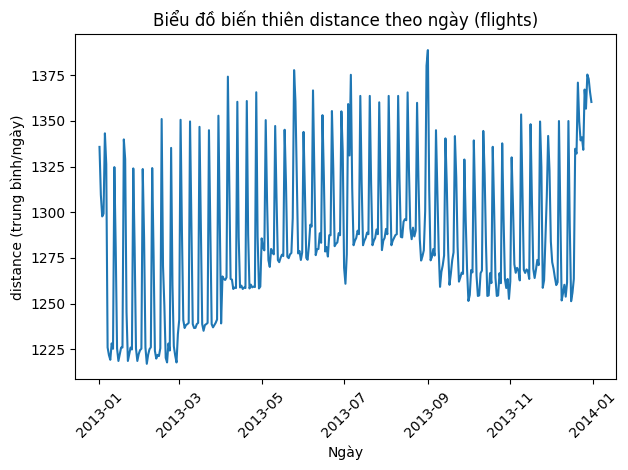

In [9]:
distance_by_day = flights.dropna(subset=['date', 'distance']).groupby('date', as_index=True)['distance'].mean().sort_index()

plt.figure()
plt.plot(distance_by_day.index, distance_by_day.values)
plt.xlabel('Ngày')
plt.ylabel('distance (trung bình/ngày)')
plt.title('Biểu đồ biến thiên distance theo ngày (flights)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hiển thị biểu đồ thống kê sex đạng cột (Salaries.csv

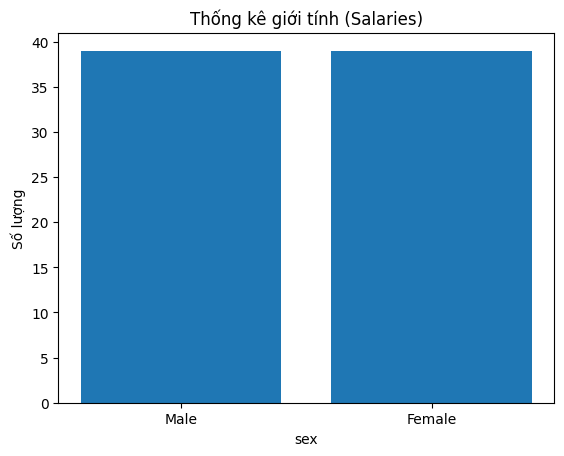

In [12]:
# Biểu đồ thống kê sex (Salaries.csv)
counts_sex = salaries['sex'].value_counts(dropna=False)

plt.figure()
plt.bar(counts_sex.index.astype(str), counts_sex.values)
plt.xlabel('sex')
plt.ylabel('Số lượng')
plt.title('Thống kê giới tính (Salaries)')
plt.show()

# Sắp xếp dữ liệu theo tên cột được nhập vào, vẽ và hiễn thị biểu đồ tương ứng

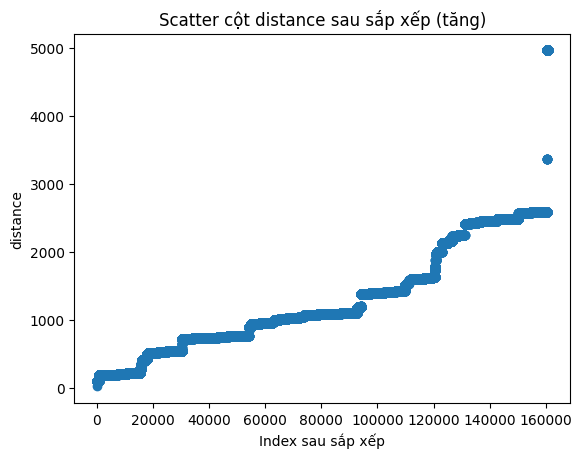

In [11]:
# Sắp xếp dữ liệu theo tên cột và vẽ scatter
dataset_name_sort = input('Nhập dataset để sắp xếp (salaries/flights): ').strip().lower()
column_sort = input('Nhập tên cột để sắp xếp: ').strip()
asc = input('Sắp xếp tăng dần? (y/n): ').strip().lower() == 'y'

df_sort = salaries if dataset_name_sort == 'salaries' else flights
if column_sort not in df_sort.columns:
    raise ValueError('Tên cột không tồn tại.')
df_sorted = df_sort.sort_values(by=column_sort, ascending=asc)

if np.issubdtype(df_sorted[column_sort].dropna().dtype, np.number):
    y = df_sorted[column_sort].dropna()
    plt.figure()
    plt.scatter(range(len(y)), y.values)
    plt.xlabel('Index sau sắp xếp')
    plt.ylabel(column_sort)
    plt.title(f'Scatter cột {column_sort} sau sắp xếp ({"tăng" if asc else "giảm"})')
    plt.show()
else:
    print('Cột không phải kiểu số, chỉ in 10 dòng đầu sau sắp xếp:')
    display(df_sorted.head(10))

# Thống kê các thông tin

Khởi hành sớm (<0): 92218
Khởi hành đúng giờ (=0): 8535
Khởi hành trễ (>0): 57665
Số chuyến bay từ LGA đến ORD: 8856

Phân bố thời lượng bay (giờ):
0-5h: 128898
5-7h: 31487
7-9h: 10
9-11h: 350
11-13h: 9
13-15h: 0
>15h: 0


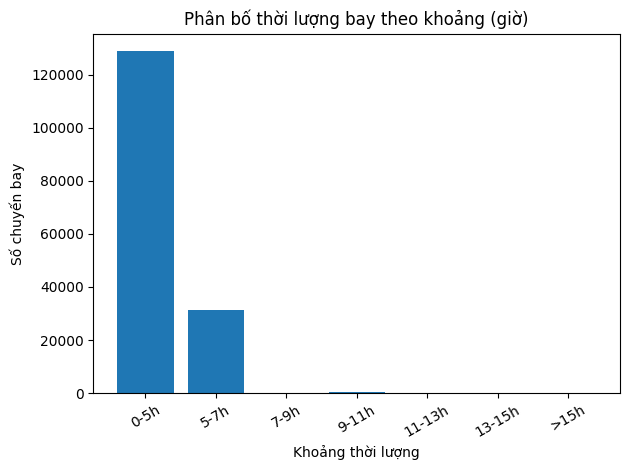

In [14]:
# Thống kê thông tin chuyến bay

# 1) dep_delay: đúng giờ (=0), sớm (<0), trễ (>0)
dep = flights['dep_delay'].dropna()
so_som = int((dep < 0).sum())
so_dung_gio = int((dep == 0).sum())
so_tre = int((dep > 0).sum())
print('Khởi hành sớm (<0):', so_som)
print('Khởi hành đúng giờ (=0):', so_dung_gio)
print('Khởi hành trễ (>0):', so_tre)

# 2) Số lượng chuyến bay xuất phát từ LGA đến ORD
mask_lga_ord = (flights['origin'] == 'LGA') & (flights['dest'] == 'ORD')
so_chuyen_LGA_ORD = int(mask_lga_ord.sum())
print('Số chuyến bay từ LGA đến ORD:', so_chuyen_LGA_ORD)

# 3) Thống kê thời lượng bay theo khoảng

dur_min = flights['air_time']
if dur_min.isna().all():

    dur_hours = flights['hour'].fillna(0) + flights['minute'].fillna(0)/60.0
else:
    dur_hours = dur_min.fillna(0)/60.0

bins = [0,5,7,9,11,13,15,np.inf]
labels = ['0-5h','5-7h','7-9h','9-11h','11-13h','13-15h','>15h']
cats = pd.cut(dur_hours, bins=bins, labels=labels, include_lowest=True, right=False)
counts = cats.value_counts().reindex(labels, fill_value=0)
print('\nPhân bố thời lượng bay (giờ):')
for k, v in counts.items():
    print(f'{k}: {int(v)}')


plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Khoảng thời lượng')
plt.ylabel('Số chuyến bay')
plt.title('Phân bố thời lượng bay theo khoảng (giờ)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()